# Importando as bibliotecas

#### Vamos usar o dataset - California Housing

MedInc (Mediana da renda dos domicílios): Esta variável representa a mediana da renda familiar para os distritos do conjunto de dados. É uma medida-chave da capacidade de compra dos residentes em uma determinada área.

HouseAge (Idade mediana das casas): Indica a idade mediana das casas em um determinado distrito. Isso pode ser um indicador do estado de conservação das casas e também da infraestrutura da região.

AveRooms (Número médio de quartos por domicílio): Esta variável representa o número médio de quartos em casas dentro de um distrito. Pode ser um indicador do tamanho médio das casas na área.

AveBedrms (Número médio de quartos para dormir): Indica o número médio de quartos designados para dormir nas casas. Isso pode fornecer insights sobre o layout das residências na região.

Population (População): Representa o número de pessoas que vivem em um distrito. É um fator importante a considerar ao avaliar a demanda por habitação na área.

AveOccup (Ocupação média por domicílio): Esta variável indica a ocupação média por domicílio no distrito. Pode ser útil para entender a densidade populacional e a capacidade de moradia na região.

Latitude (Latitude): A latitude geográfica do centro do distrito em graus decimais. É uma coordenada geográfica que pode estar relacionada a fatores como clima, localização e proximidade de serviços.

Longitude (Longitude): A longitude geográfica do centro do distrito em graus decimais. Assim como a latitude, a longitude pode influenciar vários aspectos, como localização em relação a cidades próximas e acesso a recursos.

Target (Variável alvo - Valor mediano das casas): Esta é a variável alvo que queremos prever. Representa o valor mediano das casas para cada distrito. É a variável que geralmente tentamos prever em problemas de regressão com este conjunto de dados.

**Importando as Bibliotecas**

Nesta primeira etapa, você importa as bibliotecas necessárias:

pandas: Para manipulação de dados em DataFrames.
**train_test_split** (do sklearn.model_selection): Para dividir o conjunto de dados em treinamento e teste.

**StandardScaler** (do sklearn.preprocessing): Normaliza os dados para melhorar o desempenho do modelo.

**MLPRegressor** e **DecisionTreeRegressor** (do sklearn.neural_network e sklearn.tree): Modelos de regressão para previsão.
mean_squared_error (do sklearn.metrics): Métrica de erro quadrático médio para avaliar o modelo.

**fetch_california_housing** (do sklearn.datasets): Carrega o conjunto de dados California Housing.

**matplotlib.pyplot**: Para visualizar o desempenho do modelo com gráficos.

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Importa Dataset

**Importa Dataset**

Carregamos o conjunto de dados California Housing:

fetch_california_housing: Coleta o dataset e armazena em um DataFrame, onde as colunas representam variáveis como renda, idade das casas, número médio de quartos, população, latitude, longitude e o alvo target, que é o valor mediano das casas.

In [23]:
california_housing = fetch_california_housing()
data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
data['target'] = california_housing.target

In [24]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


# Dividindo em conjunto de treino e teste

**Dividindo em Conjunto de Treino e Teste**

Dividimos o conjunto de dados para treinamento e teste:

**train_test_split**(data, test_size=0.2, random_state=0): Divide os dados em 80% para treino e 20% para teste, garantindo consistência nos resultados com random_state=0.

In [26]:
x = data.iloc[:, 0:8]
y = data.iloc[:, 8]

In [27]:
# Dividindo em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16512, 8)
(4128, 8)
(16512,)
(4128,)


**Normalização dos Dados**

A normalização ajusta a escala das variáveis de entrada, reduzindo variações nos dados e ajudando a melhorar o desempenho do modelo:

StandardScaler(): Calcula a média e desvio padrão dos dados de treino para ajustar as variáveis.
Transformação e Reconversão: Normaliza as colunas de variáveis de entrada (excluindo target) e reverte para DataFrame, preservando a coluna target.

In [29]:
# Normalizando apenas as features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Árvore de Decisão

**Árvore de Decisão**

Primeiro modelo utilizado, onde treinamos uma árvore de decisão para prever a variável target:

**DecisionTreeRegressor()**: Modelo de regressão que particiona os dados em uma estrutura de árvore para prever o valor mediano das casas.
Treinamento e Predição: O modelo é treinado e gera previsões sobre os dados de teste.

**Erro Quadrático Médio (MSE)**: Avaliamos a precisão do modelo com mean_squared_error, que mostra a média dos erros quadráticos entre os valores reais e previstos.

In [30]:
# Definir a seed
random_seed = 42

In [31]:
tree_model = DecisionTreeRegressor(random_state=random_seed)
tree_model.fit(X_train_scaled, y_train)
tree_predict = tree_model.predict(X_test_scaled)
mse_tree = mean_squared_error(y_test, tree_predict)

In [32]:
mse_tree

0.6538673754933624

# Redes Neurais

**Rede Neural**

Em seguida, utilizamos um modelo de rede neural para fazer previsões:

**MLPRegressor**(hidden_layer_sizes=(50,30,1), activation="identity", solver='adam', random_state=1, max_iter=500): Rede neural com 3 camadas (50, 30 e 1 neurônios, respectivamente) e ativação linear (identity). Utilizamos o adam como otimizador e limitamos a 500 iterações para evitar o sobreajuste.
Treinamento e Predição: O modelo é treinado e, em seguida, utilizado para gerar previsões sobre os dados de teste.

**Erro Quadrático Médio (MSE)**: Avaliamos a precisão do modelo com o MSE, calculando a diferença média ao quadrado entre os valores reais e os previstos.

In [33]:
nn_model = MLPRegressor(hidden_layer_sizes=(50,30,1),activation="identity",solver='adam',random_state=1, max_iter=500)
nn_model.fit(X_train_scaled, y_train)
nn_predict = nn_model.predict(X_test_scaled)
mse_nn = mean_squared_error(y_test, nn_predict)

In [34]:
mse_nn

0.5288318084131532

**Visualização dos Resultados**

Finalmente, comparamos as previsões da rede neural aos valores reais:

Gráfico de Desempenho: Usamos matplotlib para visualizar as previsões da rede neural (em azul) contra os valores reais (em vermelho), o que nos ajuda a avaliar visualmente o desempenho do modelo e sua precisão.


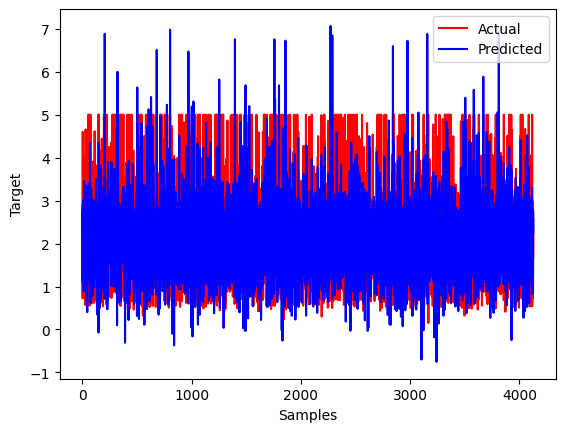

In [35]:
# Plot
plt.plot(y_test.values, color='red', label='Actual')
plt.plot(nn_predict, color='blue', label='Predicted')
plt.xlabel('Samples')
plt.ylabel('Target')
plt.legend()
plt.show()